# <img style='float: left' width="100px" src="http://1.bp.blogspot.com/-gANdrsx2ceo/VkAzFQYZ8HI/AAAAAAAARXo/r25jef0dij4/s1600/2FNLTensorFlow.png"> <br> <br> <br> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <br><font color='#EB8B34'>Tensorflow Example #1: 2D Linear Regression</font>

## Overview
In this notebook we go through a problem that will be modeled with _regression_. In regression, we predict continuous values of y based on the data.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Set up the data

In [13]:
num_points = 1000
vectors_set = []
for i in xrange(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

Let's plot the data to see what we're working with.

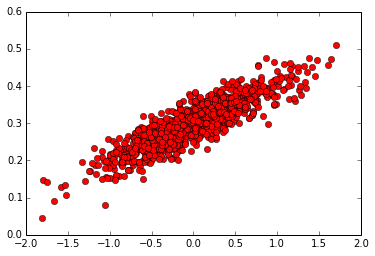

In [14]:
plt.plot(x_data, y_data, 'ro')
plt.show()

## Setup the Tensorflow Graph

Set `x` as a placeholder tensor for the training data we will pass into the graph. This placeholder lets us change the data that we pass in as input to the TensorFlow graph. The data type is `float32` and the shape is `[None]`. `None` specifies that the tensor can hold an arbitrary number of data points.

In [15]:
x = tf.placeholder(tf.float32)

Variables represent the things that TensorFlow changes in order to make the model perform better on the training data. Set `W` and `b` to be model variables that we will train.

In [16]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.ones([1]))

#### The model
We code the mathematical model we are building.

In [17]:
y = W * x + b

We have the linear model above - great! But we still need to figure out what the best parameters `W` and `b` are.  One way to do this is to iterate through each value of the training set and modify the parameters `W` and `b` in order to get a more precise answer every time. To find out if we are improving in these iterations, we will define a cost function (also called “loss function”) that measures how “good” (actually, as “bad”) a certain line is. 

Below is our *loss* (or "cost") function: it is a variant of the mean-square error.<br><br>

<img width="400px" src="mse.png"><br><br>

Notice that we can actually ignore the `1/n` term because it doesn't ultimately affect our minimization, since minimize A is the same as minimizing A/n.

In [7]:
loss = tf.reduce_mean(tf.square(y - y_data))

Now, we need to define an optimizer that we will use to _minimize_ the loss. The idea here is we want to minimize the loss so that we find the best values of the variables `W` and `b`.
<br><br>
The optimizer we'll use is the `tf.train.GradientDescentOptimizer`. This will compute gradients for a loss and apply gradients to variables.
<br><br>
The _gradient_ represents the slope of the tangent of the graph of the function. It points in the direction of the greatest rate of increase of the function, and its magnitude is the slope of the graph in that direction. Since we want to _minimize the loss_, we take steps proportional to the negative of the gradient. The `learning_rate` corresponds to the step size, and `num_steps` is the number of steps we take.
<br><br>
<img width="400px" src="grad.png"><br><br>
We need to be careful with the learning rate - if we take steps that are too big or too small, we may never converge on the global minimum.
<img width="400px" src="grad2.png"><br><br>

In [8]:
num_steps = 20
learning_rate = 0.25
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

Define the training step of stochastic gradient descent.

In [9]:
training_step = optimizer.minimize(loss)

## Execute the Graph

step = 0
loss = 0.146763


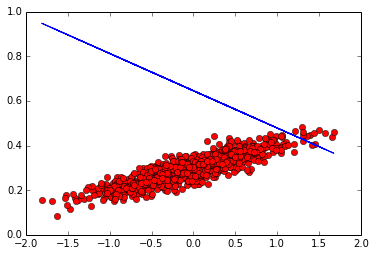

step = 1
loss = 0.046385


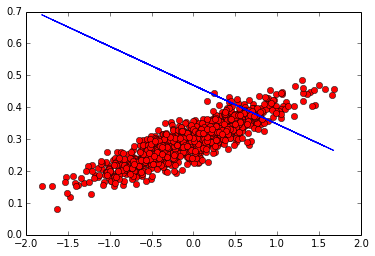

step = 2
loss = 0.0188267


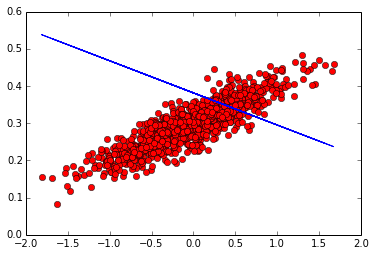

step = 3
loss = 0.0101306


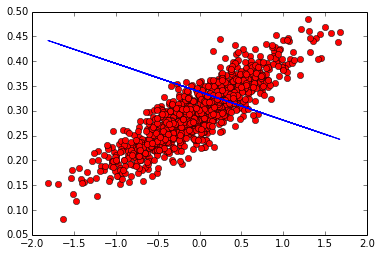

step = 4
loss = 0.0066438


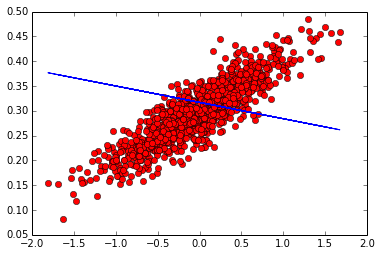

step = 5
loss = 0.00482101


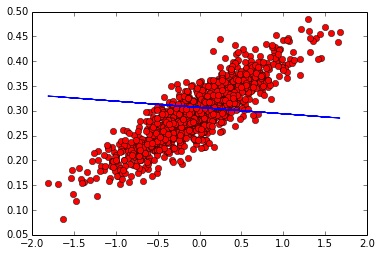

step = 6
loss = 0.003677


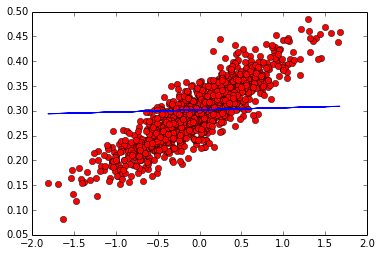

step = 7
loss = 0.00289302


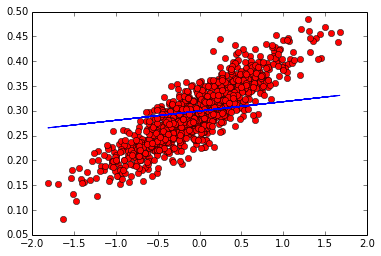

step = 8
loss = 0.00233681


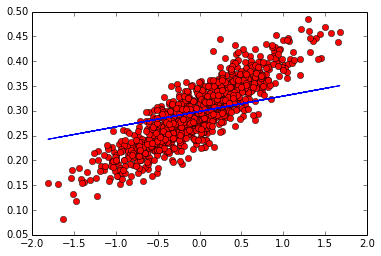

step = 9
loss = 0.0019372


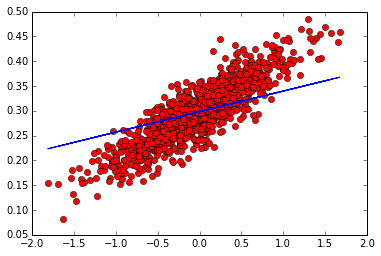

step = 10
loss = 0.00164882


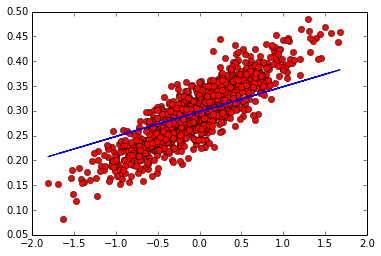

step = 11
loss = 0.00144041


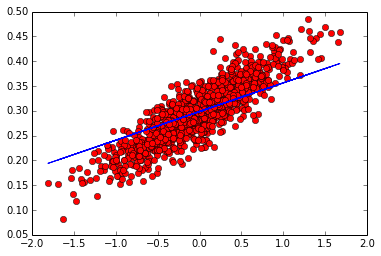

step = 12
loss = 0.00128969


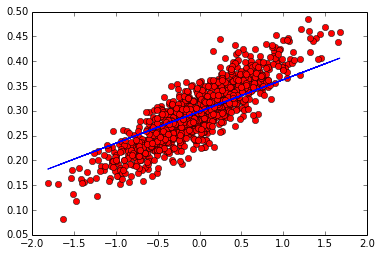

step = 13
loss = 0.00118069


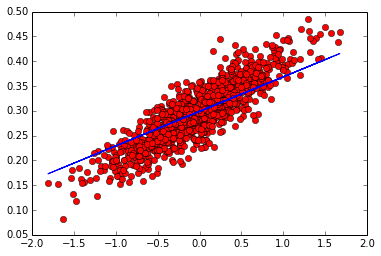

step = 14
loss = 0.00110185


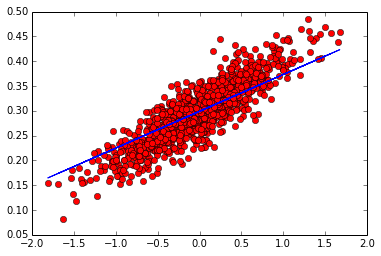

step = 15
loss = 0.00104482


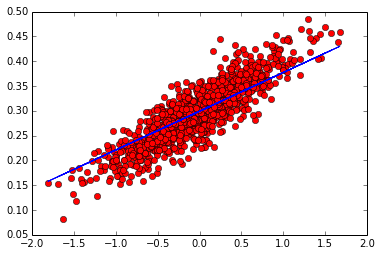

step = 16
loss = 0.00100358


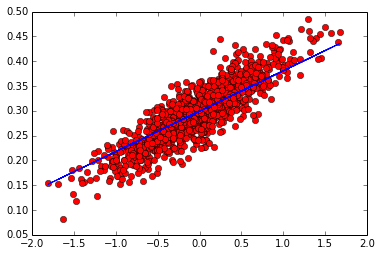

step = 17
loss = 0.000973739


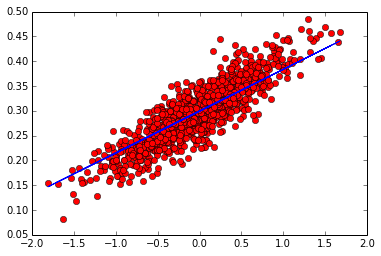

step = 18
loss = 0.000952158


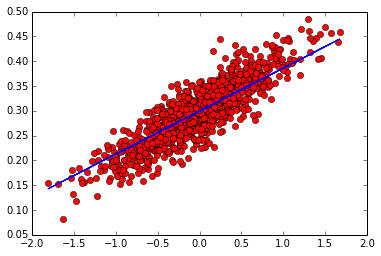

step = 19
loss = 0.000936548


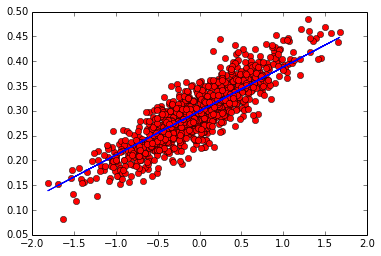

W = 0.0887039
b = 0.299634


In [10]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in xrange(num_steps):
    sess.run(training_step, feed_dict={x: x_data})
    print "step = %s" % (step)
    print "loss = %s" % (sess.run(loss, feed_dict={x: x_data}))
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
    plt.show()

print "W = %s" % sess.run(W)[0]
print "b = %s" % sess.run(b)[0]

## Make a prediction
If we feed in `x` = `0`, then we expect that to be the value of the y-intercept, namely `0.3`

In [11]:
pred = sess.run(y, feed_dict={x: [0.0]})
print pred[0]

0.299634
